# Prep

## Imports & paths

In [59]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
import scipy
import statsmodels.formula.api as smf
from Functions import *
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
5,15670,high,0,"[3, 0]","[0, 3]",NaN,"[0, 3]","[3, 0]",NaN,NaN,"[0, 3]",NaN,NaN
6,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
9,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
10,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
12,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
15,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
17,26179,high,0,"[1, 2]","[1, 3]",NaN,"[1, 3]","[1, 2]",NaN,NaN,"[1, 3]",NaN,NaN
19,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (66,67) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,count_star3,star_rule,star0_inplace,star1_inplace,star2_inplace,star3_inplace,sex,age_years,age_months,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,7.0,23.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290972,884.860,0.0,79.0,transfer,2790.0,1240253.0,0.0-595.0-0.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290973,203.660,0.0,80.0,transfer,2791.0,1240463.0,0.0-595.0-1.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290974,262.600,0.0,73.0,transfer,2792.0,1240731.0,0.0-595.0-2.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True


## Get all_data_w (spread 4 subtrials out into wide format)

In [5]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'trial']
all_data['subtrial'] = all_data['subtrial'].astype(int)
all_data_w = all_data[id_cols + ['subtrial', 'rt']].pivot_table(index=id_cols, columns=['subtrial'], values=['rt']).reset_index()
all_data_w.columns = [''.join([str(e) for e in f]) for f in all_data_w.columns.values]
all_data_w

,sid,trial_type,phase,block,trial,rt0,rt1,rt2,rt3
0,13885,learning,high,0.0,0.0,797.865,654.720,1317.900,276.305
1,13885,learning,high,0.0,1.0,823.310,239.845,389.015,298.555
2,13885,learning,high,0.0,2.0,42.995,344.920,446.100,284.535
3,13885,learning,high,0.0,3.0,510.510,485.415,392.410,273.690
4,13885,learning,high,0.0,4.0,217.365,215.930,477.475,279.585
...,...,...,...,...,...,...,...,...,...
55505,39925,transfer,low,7.0,20.0,527.250,207.180,990.190,208.265
55506,39925,transfer,low,7.0,21.0,2225.690,153.660,895.005,337.290
55507,39925,transfer,low,7.0,22.0,374.585,588.255,419.135,221.605
55508,39925,transfer,low,7.0,23.0,497.695,202.610,NaN,NaN


In [6]:
# id_cols = ['sid', 'trial_type', 'phase', 'block', 'trial']
# all_data['subtrial'] = all_data['subtrial'].astype(int)
# all_data_w = all_data[id_cols + ['subtrial', 'middle_item']].pivot_table(index=id_cols, columns=['subtrial'], values=['middle_item']).reset_index()
# all_data_w.columns = [''.join([str(e) for e in f]) for f in all_data_w.columns.values]
# all_data_w

In [7]:
all_data_w = pd.merge(
    all_data.loc[(all_data['subtrial'] == 3), ['sid', 'trial_type', 'phase', 'block', 'trial', 'trial_', 'star_iteration', 'acc', 'goal_star', 'unlocked_star']],
    all_data_w, on=id_cols
)
all_data_w

,sid,trial_type,phase,block,trial,trial_,star_iteration,acc,goal_star,unlocked_star,rt0,rt1,rt2,rt3
0,13885,learning,high,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,797.865,654.720,1317.900,276.305
1,13885,learning,high,0.0,1.0,1.0,0.0,0.0,3.0,-1.0,823.310,239.845,389.015,298.555
2,13885,learning,high,0.0,2.0,2.0,0.0,0.0,3.0,-1.0,42.995,344.920,446.100,284.535
3,13885,learning,high,0.0,3.0,3.0,0.0,0.0,3.0,-1.0,510.510,485.415,392.410,273.690
4,13885,learning,high,0.0,4.0,4.0,0.0,0.0,3.0,-1.0,217.365,215.930,477.475,279.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55505,39925,transfer,low,7.0,20.0,195.0,2.0,0.0,1.0,0.0,527.250,207.180,990.190,208.265
55506,39925,transfer,low,7.0,21.0,196.0,2.0,0.0,1.0,-1.0,2225.690,153.660,895.005,337.290
55507,39925,transfer,low,7.0,22.0,197.0,2.0,0.0,1.0,-1.0,374.585,588.255,419.135,221.605
55508,39925,transfer,low,7.0,23.0,NaN,NaN,NaN,NaN,NaN,497.695,202.610,NaN,NaN


In [8]:
all_data_w['total_rt'] = np.sum(all_data_w[['rt0', 'rt1', 'rt2', 'rt3']], axis=1)

for subtrial in range(4):
    all_data_w['rel_rt{}'.format(subtrial)] = all_data_w['rt{}'.format(subtrial)] / all_data_w['total_rt']

# zigzag
all_data_w['rt0-rt1+rt2-rt3'] = (all_data_w['rt0'] - all_data_w['rt1'] + all_data_w['rt2'] - all_data_w['rt3']) / all_data_w['total_rt']

# planning
all_data_w['rt0+rt2'] = (all_data_w['rt0'] + all_data_w['rt2']) / all_data_w['total_rt']

# automation item0
all_data_w['rt0-rt1'] = (all_data_w['rt0'] - all_data_w['rt1']) / all_data_w['total_rt']

# automation item1
all_data_w['rt2-rt3'] = (all_data_w['rt2'] - all_data_w['rt3']) / all_data_w['total_rt']

# automation 4-key sequence
all_data_w['rt2-rt0'] = (all_data_w['rt2'] - all_data_w['rt0']) / all_data_w['total_rt']
all_data_w['rt2-rt1'] = (all_data_w['rt2'] - all_data_w['rt1']) / all_data_w['total_rt']

all_data_w

,sid,trial_type,phase,block,trial,trial_,star_iteration,acc,goal_star,unlocked_star,...,rel_rt0,rel_rt1,rel_rt2,rel_rt3,rt0-rt1+rt2-rt3,rt0+rt2,rt0-rt1,rt2-rt3,rt2-rt0,rt2-rt1
0,13885,learning,high,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,...,0.261871,0.214888,0.432554,0.090687,0.388849,0.694424,0.046982,0.341866,0.170683,0.217665
1,13885,learning,high,0.0,1.0,1.0,0.0,0.0,3.0,-1.0,...,0.470268,0.136998,0.222202,0.170532,0.384941,0.692470,0.333271,0.051670,-0.248066,0.085205
2,13885,learning,high,0.0,2.0,2.0,0.0,0.0,3.0,-1.0,...,0.038438,0.308364,0.398820,0.254378,-0.125484,0.437258,-0.269925,0.144441,0.360382,0.090456
3,13885,learning,high,0.0,3.0,3.0,0.0,0.0,3.0,-1.0,...,0.307161,0.292062,0.236104,0.164673,0.086530,0.543265,0.015099,0.071431,-0.071058,-0.055959
4,13885,learning,high,0.0,4.0,4.0,0.0,0.0,3.0,-1.0,...,0.182605,0.181400,0.401120,0.234875,0.167450,0.583725,0.001206,0.166245,0.218515,0.219720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55505,39925,transfer,low,7.0,20.0,195.0,2.0,0.0,1.0,0.0,...,0.272779,0.107187,0.512286,0.107748,0.570130,0.785065,0.165592,0.404538,0.239507,0.405099
55506,39925,transfer,low,7.0,21.0,196.0,2.0,0.0,1.0,-1.0,...,0.616254,0.042546,0.247811,0.093390,0.728129,0.864065,0.573708,0.154421,-0.368443,0.205265
55507,39925,transfer,low,7.0,22.0,197.0,2.0,0.0,1.0,-1.0,...,0.233593,0.366839,0.261375,0.138194,-0.010065,0.494968,-0.133246,0.123181,0.027782,-0.105464
55508,39925,transfer,low,7.0,23.0,NaN,NaN,NaN,NaN,NaN,...,0.710683,0.289317,NaN,NaN,NaN,NaN,0.421366,NaN,NaN,NaN


# Results

## RT zigzag pattern

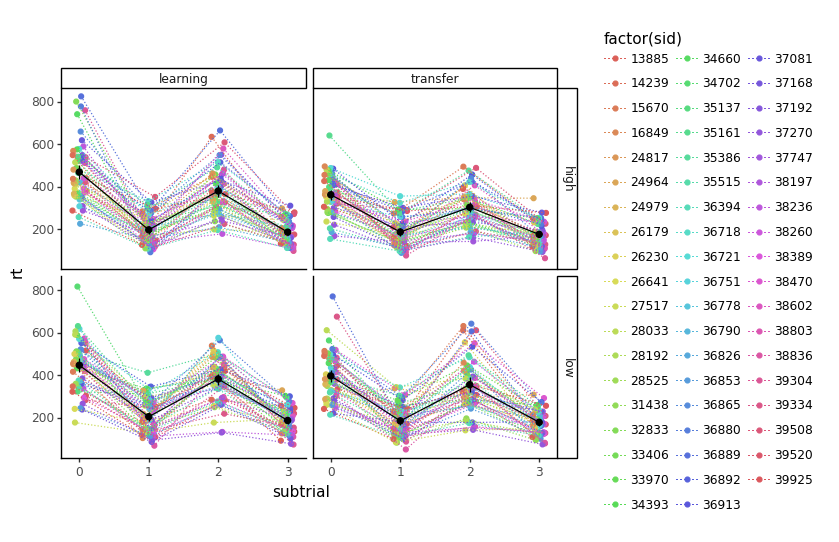

<ggplot: (149611414041)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_zrtOverSubtrialWithIndividuals.png


In [9]:
subj_dat = all_data.groupby(['sid', 'phase', 'trial_type', 'subtrial']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('subtrial', 'rt', color='factor(sid)'))
     + gg.geom_point(position=gg.position_dodge(width=0.2))
     + gg.geom_line(linetype='dotted', position=gg.position_dodge(width=0.2))
     + gg.stat_summary(gg.aes(group=1), color='black')
     + gg.stat_summary(gg.aes(group=1), color='black', geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_zrtOverSubtrialWithIndividuals.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtOverSubtrial.png


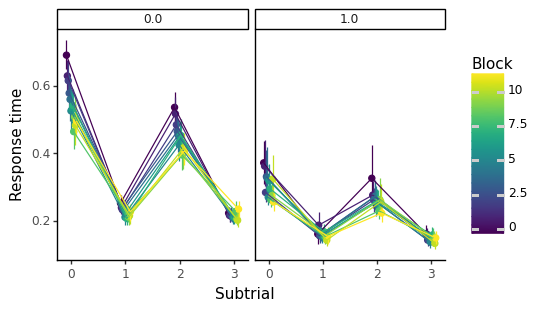

<ggplot: (149620914472)>


In [86]:
subj_dat = all_data.loc[
    all_data['trial_type'] == 'learning'
].groupby(['sid', 'block', 'subtrial', 'acc']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 3)
g = (gg.ggplot(subj_dat, gg.aes('subtrial', 'rt/1000', color='block', group='block'))
     + gg.stat_summary(position=gg.position_dodge(width=0.2))
     + gg.stat_summary(geom='line', position=gg.position_dodge(width=0.2))
     + gg.labs(x='Subtrial', y='Response time', color='Block')
     + gg.facet_grid('~ acc')
    )
g.save(os.path.join(plot_dir, '101_RtOverSubtrial.png'))
print(g)

In [81]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'trial', 'acc']

diff_dat_01 = pd.merge(
    all_data.loc[all_data['subtrial'] == 0, id_cols + ['rt']],
    all_data.loc[all_data['subtrial'] == 1, id_cols + ['rt']],
    on=id_cols, suffixes=['_0', '_1']
)
diff_dat_23 = pd.merge(
    all_data.loc[all_data['subtrial'] == 2, id_cols + ['rt']],
    all_data.loc[all_data['subtrial'] == 3, id_cols + ['rt']],
    on=id_cols, suffixes=['_2', '_3']
)
diff_dat = pd.merge(
    diff_dat_01, diff_dat_23
)

diff_dat['rt_0m1'] = diff_dat['rt_0'] - diff_dat['rt_1']
diff_dat['rt_2m3'] = diff_dat['rt_2'] - diff_dat['rt_3']
diff_dat['rt_0m2'] = diff_dat['rt_0'] - diff_dat['rt_2']
diff_dat['rt_1m3'] = diff_dat['rt_1'] - diff_dat['rt_3']
diff_dat

,sid,trial_type,phase,block,trial,acc,rt_0,rt_1,rt_2,rt_3,rt_0m1,rt_2m3,rt_0m2,rt_1m3
0,13885,learning,high,0.0,0.0,0.0,797.865,654.720,1317.900,276.305,143.145,1041.595,-520.035,378.415
1,13885,learning,high,0.0,1.0,0.0,823.310,239.845,389.015,298.555,583.465,90.460,434.295,-58.710
2,13885,learning,high,0.0,2.0,0.0,42.995,344.920,446.100,284.535,-301.925,161.565,-403.105,60.385
3,13885,learning,high,0.0,3.0,0.0,510.510,485.415,392.410,273.690,25.095,118.720,118.100,211.725
4,13885,learning,high,0.0,4.0,0.0,217.365,215.930,477.475,279.585,1.435,197.890,-260.110,-63.655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55481,39925,transfer,low,7.0,20.0,0.0,527.250,207.180,990.190,208.265,320.070,781.925,-462.940,-1.085
55482,39925,transfer,low,7.0,21.0,0.0,2225.690,153.660,895.005,337.290,2072.030,557.715,1330.685,-183.630
55483,39925,transfer,low,7.0,22.0,0.0,374.585,588.255,419.135,221.605,-213.670,197.530,-44.550,366.650
55484,39925,transfer,low,7.0,23.0,NaN,497.695,202.610,NaN,NaN,295.085,NaN,NaN,NaN


In [82]:
sum_dat = diff_dat.loc[
    diff_dat['trial_type'] == 'learning'
].groupby(['sid', 'acc']).aggregate('mean').reset_index()
sum_dat

,sid,acc,block,trial,rt_0,rt_1,rt_2,rt_3,rt_0m1,rt_2m3,rt_0m2,rt_1m3
0,13885,0.0,4.814815,10.626543,409.959907,144.487886,520.403318,133.435941,265.472022,386.967377,-110.443410,11.051944
1,13885,1.0,6.304348,13.612319,181.436938,98.077736,229.011268,86.919475,83.359203,142.091793,-47.574330,11.158261
2,14239,0.0,5.461394,11.516008,457.097928,174.197740,469.981168,231.905838,282.900188,238.075330,-12.883239,-57.708098
3,14239,1.0,5.761905,16.619048,357.000000,170.063492,375.920635,148.857143,186.936508,227.063492,-18.920635,21.206349
4,15670,0.0,4.585106,8.843972,605.590195,214.453493,663.878759,210.848245,391.136702,453.030514,-58.288564,3.605248
...,...,...,...,...,...,...,...,...,...,...,...,...
107,39508,1.0,5.586735,14.933673,206.060995,205.228214,314.483010,203.581582,0.832781,110.901429,-108.422015,1.646633
108,39520,0.0,4.546584,10.965839,454.431863,149.929534,406.649798,195.411304,304.502329,211.238494,47.782065,-45.481770
109,39520,1.0,6.689781,13.281022,210.729234,102.140949,185.039015,106.856332,108.588285,78.182682,25.690219,-4.715383
110,39925,0.0,5.697531,11.458848,496.327912,269.415278,378.509496,251.173683,226.912634,127.335813,117.818416,18.241595


In [89]:
scipy.stats.ttest_1samp(sum_dat.loc[sum_dat['acc'] == acc, col], popmean=0)[1]

0.005493052646980899

In [97]:
for acc in [0, 1]:
    print("ACC {}".format(acc))
    for col in ['rt_0m1', 'rt_2m3', 'rt_0m2', 'rt_1m3']:
        ttest = scipy.stats.ttest_1samp(sum_dat.loc[sum_dat['acc'] == acc, col], popmean=0)
        t, p = ttest[0].round(1), ttest[1].round(4)
        print(col, 't: {}; p: {}; Bonferroni-p: {}'.format(t, p, 8 * p))

ACC 0
rt_0m1 t: 17.4; p: 0.0; Bonferroni-p: 0.0
rt_2m3 t: 15.9; p: 0.0; Bonferroni-p: 0.0
rt_0m2 t: 5.8; p: 0.0; Bonferroni-p: 0.0
rt_1m3 t: 3.6; p: 0.0006; Bonferroni-p: 0.0048
ACC 1
rt_0m1 t: 13.1; p: 0.0; Bonferroni-p: 0.0
rt_2m3 t: 10.7; p: 0.0; Bonferroni-p: 0.0
rt_0m2 t: 3.3; p: 0.0018; Bonferroni-p: 0.0144
rt_1m3 t: 2.9; p: 0.0055; Bonferroni-p: 0.044


In [57]:
predictors = [
    '1',
    'C(subtrial)',
    'block * C(subtrial)',
]

for pred in predictors:
    mod = smf.mixedlm(formula='rt ~ {}'.format(pred), data=subj_dat, groups=subj_dat['sid']).fit()
    print(mod.summary())

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2118: ConvergenceWarnin

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: rt         
No. Observations: 2688    Method:             REML       
No. Groups:       56      Scale:              25968.8007 
Min. group size:  48      Log-Likelihood:     -17539.0277
Max. group size:  48      Converged:          No         
Mean group size:  48.0                                   
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   307.098   10.354 29.660 0.000 286.804 327.391
Group Var  5462.487   14.218                             

              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    rt         
No. Observations:    2688       Method:                REML       
No. Groups:          56         Scale:                 12319.4017 
Min. group size:     48         Log-Likelihood:        -1653

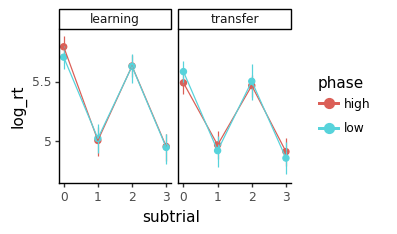

<ggplot: (149618112555)>

In [11]:
g += gg.aes(y='log_rt')
g

## All RT components

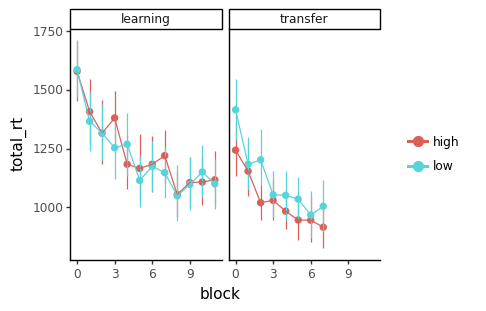

<ggplot: (149620546952)>


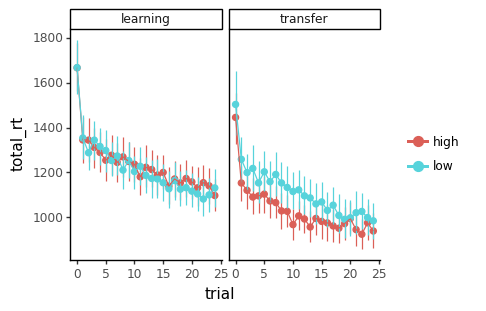

<ggplot: (149620546952)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


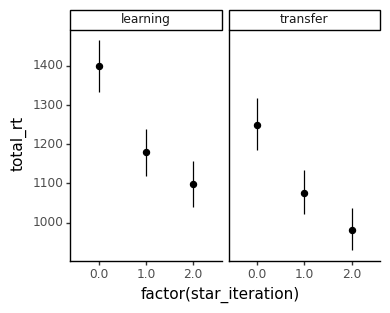

<ggplot: (149620546952)>


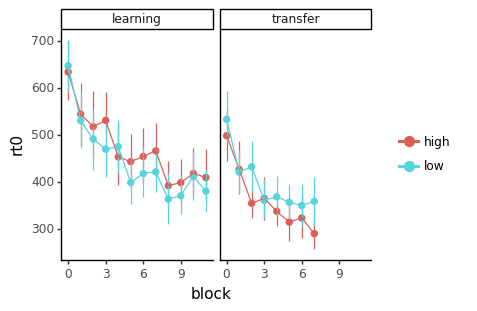

<ggplot: (149619726900)>


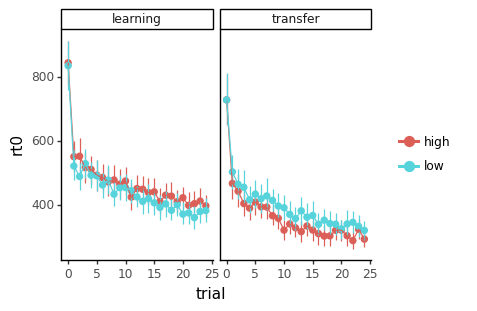

<ggplot: (149619726900)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


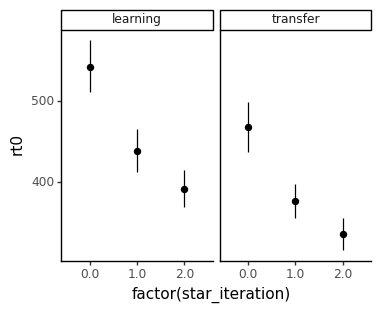

<ggplot: (149619726900)>


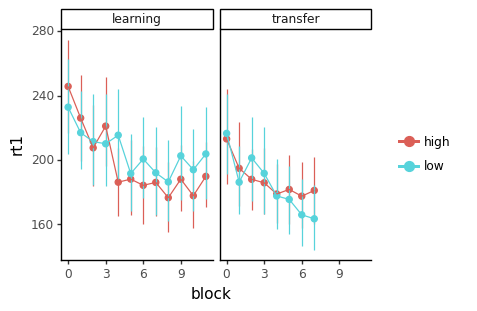

<ggplot: (149619723249)>


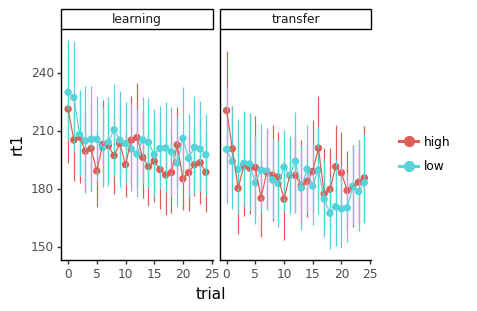

<ggplot: (149619723249)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


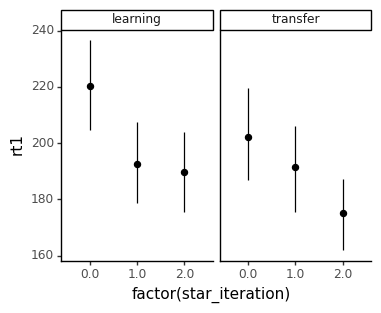

<ggplot: (149619723249)>


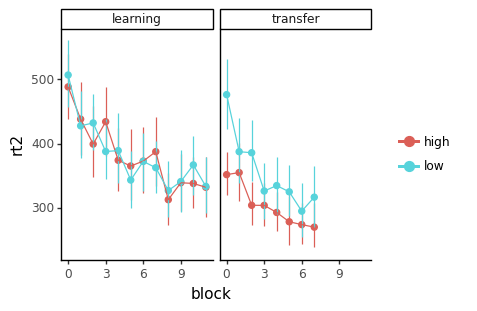

<ggplot: (149619130549)>


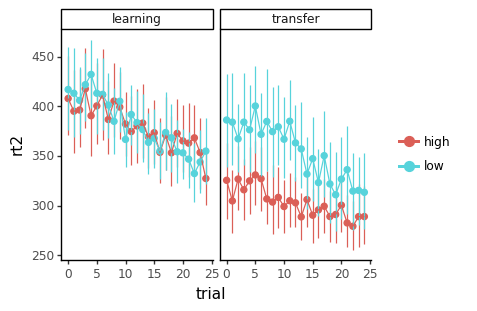

<ggplot: (149619130549)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


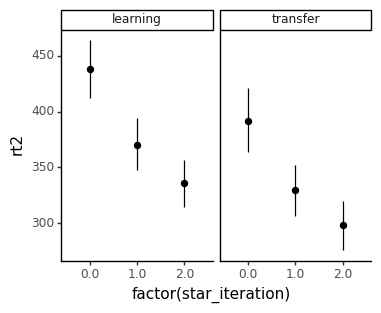

<ggplot: (149619130549)>


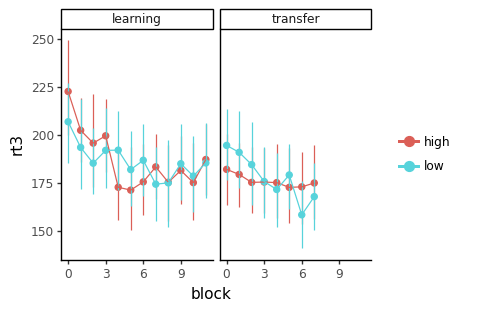

<ggplot: (149619175521)>


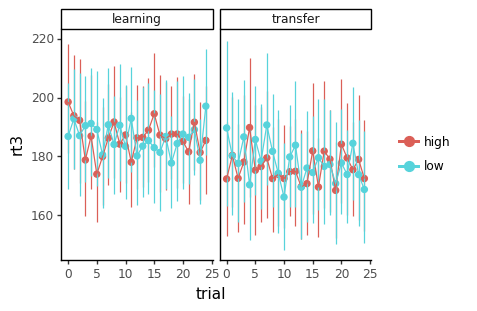

<ggplot: (149619175521)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


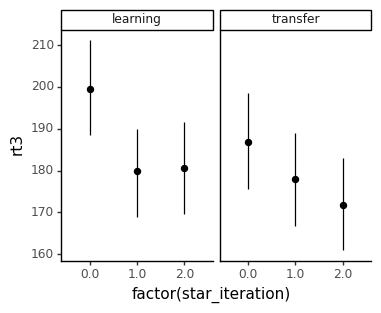

<ggplot: (149619175521)>


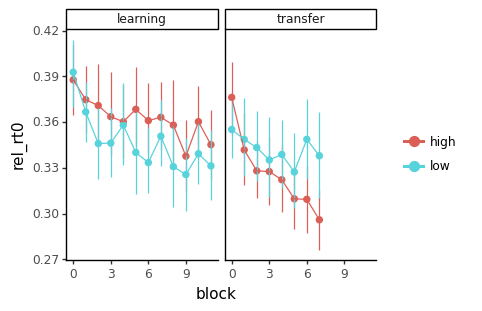

<ggplot: (149639832908)>


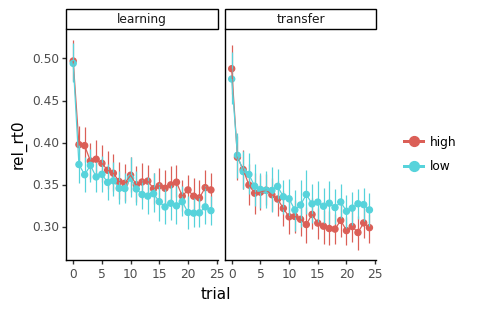

<ggplot: (149639832908)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


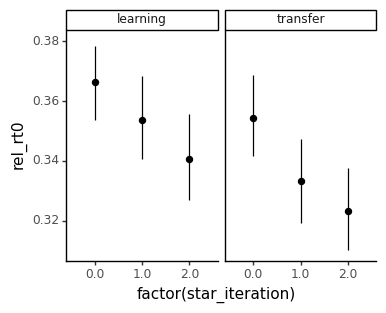

<ggplot: (149639832908)>


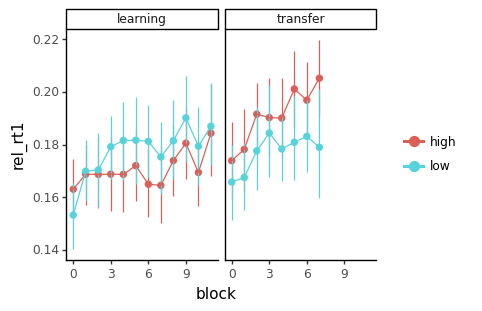

<ggplot: (149619728607)>


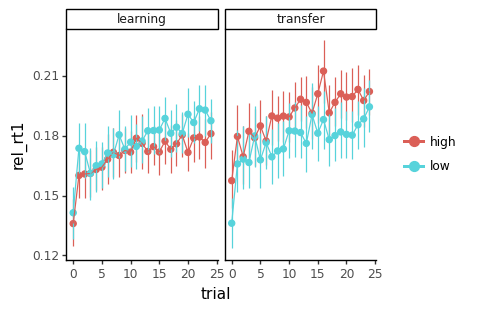

<ggplot: (149619728607)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


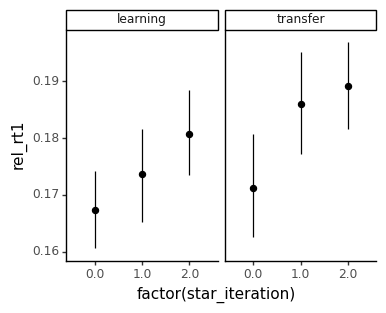

<ggplot: (149619728607)>


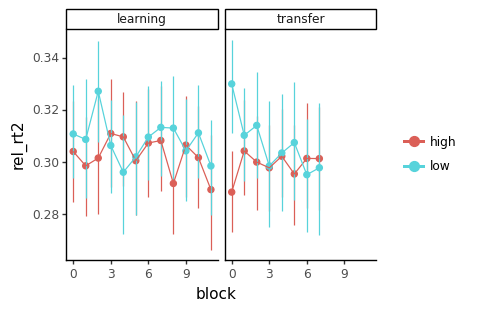

<ggplot: (149617852823)>


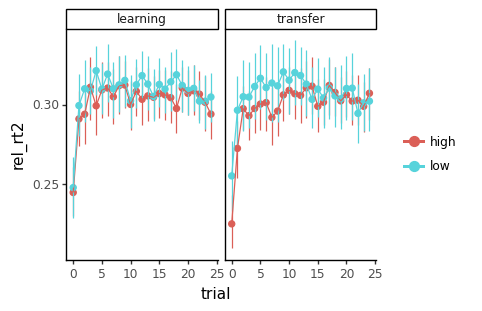

<ggplot: (149617852823)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


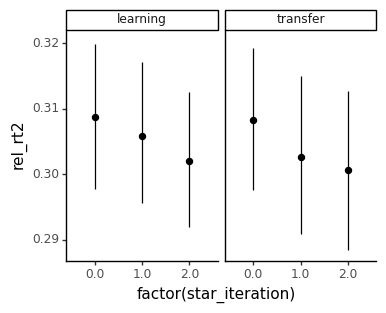

<ggplot: (149617852823)>


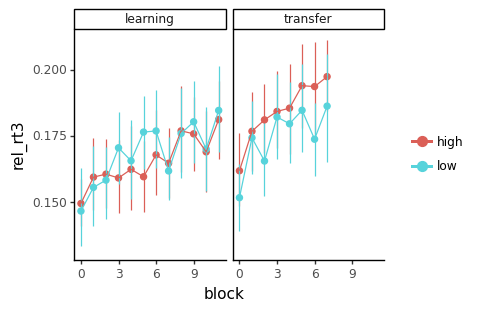

<ggplot: (149619710727)>


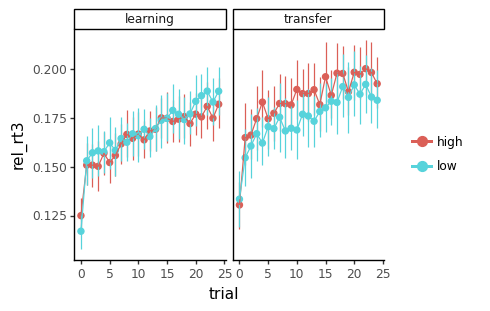

<ggplot: (149619710727)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


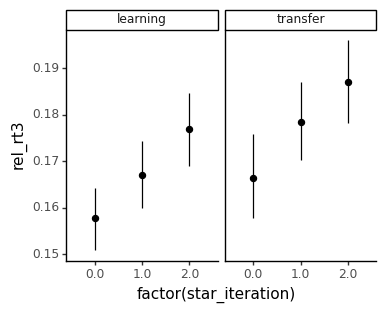

<ggplot: (149619710727)>


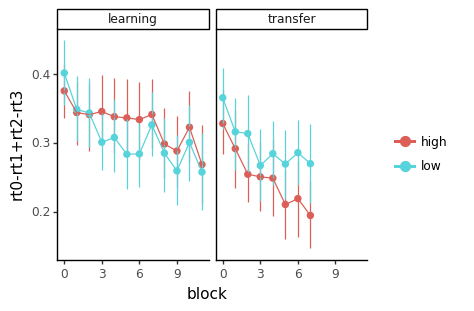

<ggplot: (149620214989)>


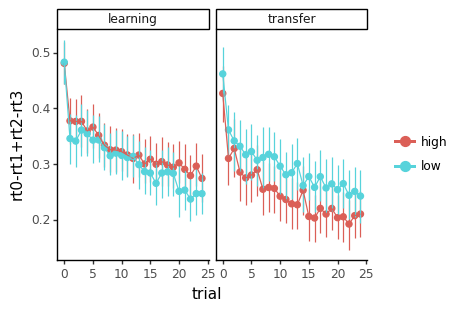

<ggplot: (149620214989)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


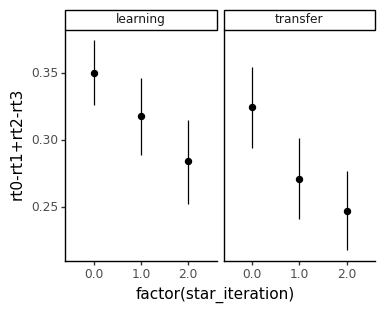

<ggplot: (149620214989)>


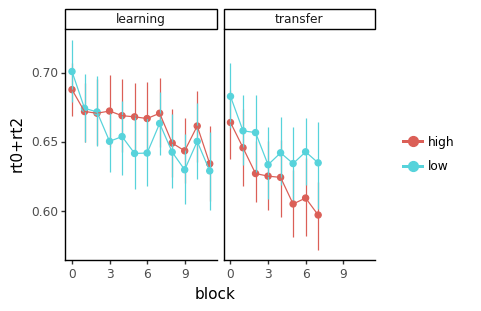

<ggplot: (149620075478)>


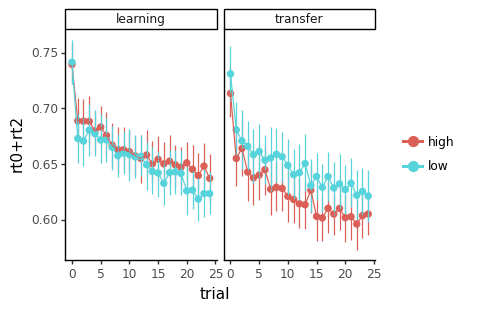

<ggplot: (149620075478)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


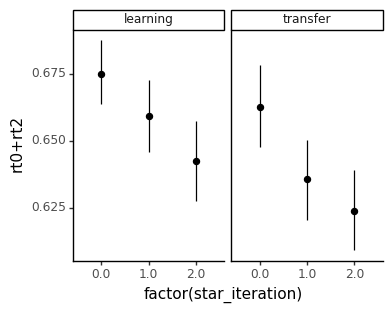

<ggplot: (149620075478)>


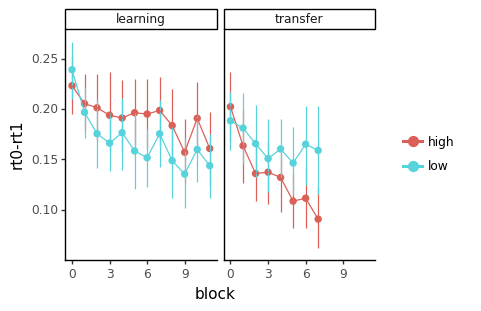

<ggplot: (149620181149)>


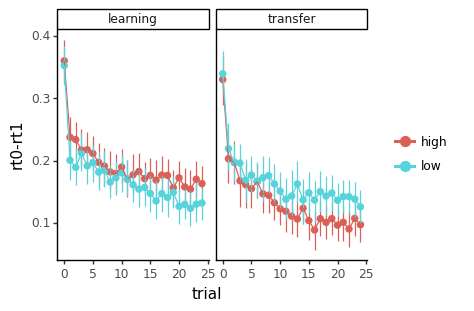

<ggplot: (149620181149)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


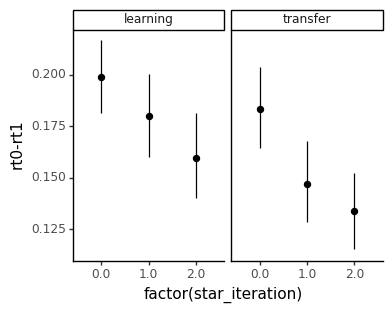

<ggplot: (149620181149)>


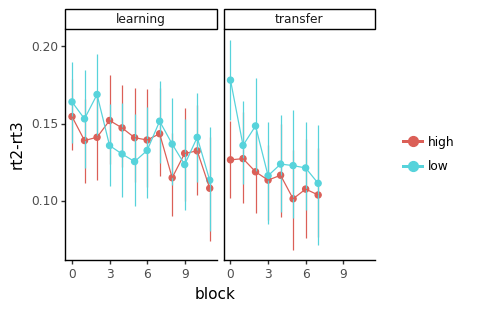

<ggplot: (149619313972)>


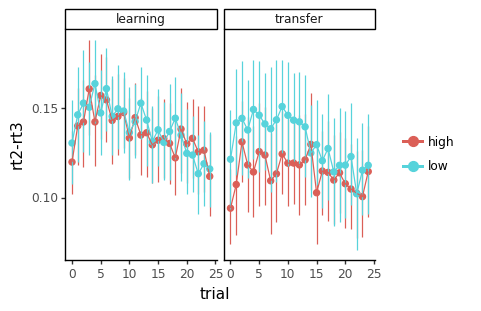

<ggplot: (149619313972)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


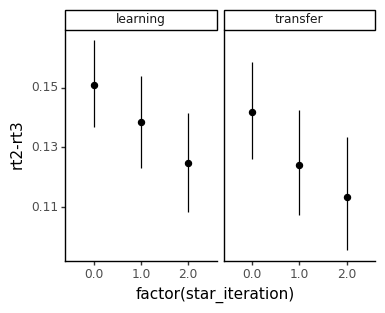

<ggplot: (149619313972)>


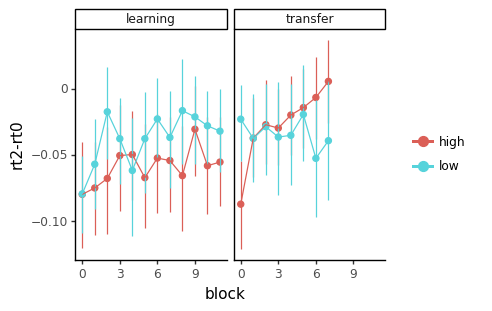

<ggplot: (149619254447)>


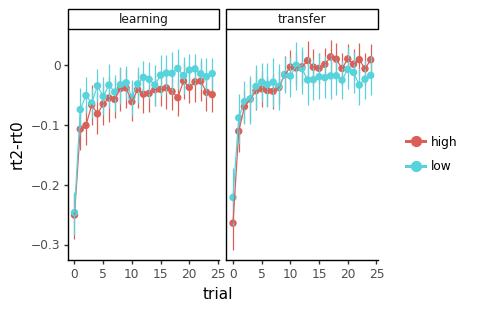

<ggplot: (149619254447)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


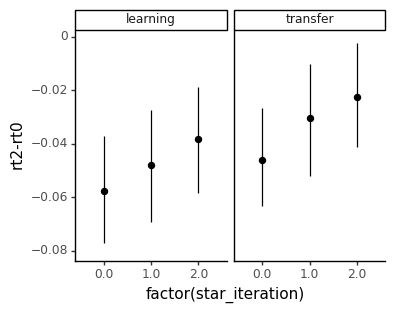

<ggplot: (149619254447)>


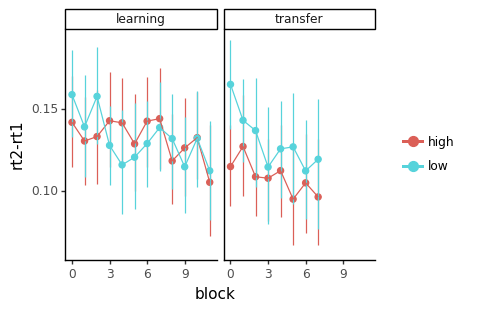

<ggplot: (149619195417)>


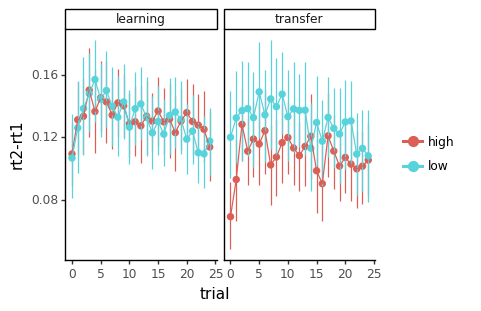

<ggplot: (149619195417)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


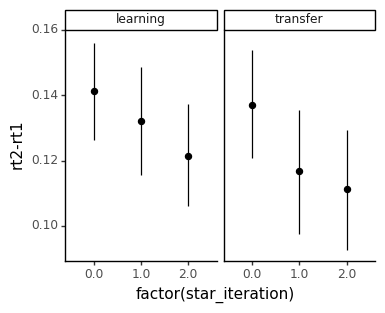

<ggplot: (149619195417)>


In [12]:
subj_dat_block = all_data_w.groupby(['sid', 'trial_type', 'phase', 'block']).aggregate('mean').reset_index()
subj_dat_trial = all_data_w.groupby(['sid', 'trial_type', 'phase', 'trial']).aggregate('mean').reset_index()
subj_dat_iteration = all_data_w.groupby(['sid', 'trial_type', 'phase', 'star_iteration']).aggregate('mean').reset_index()

gg.options.figure_size = (4, 3)
for y in ['total_rt'] + ['rt{}'.format(s) for s in range(4)] + ['rel_rt{}'.format(s) for s in range(4)] + ['rt0-rt1+rt2-rt3', 'rt0+rt2', 'rt0-rt1', 'rt2-rt3', 'rt2-rt0', 'rt2-rt1']:
    g = (gg.ggplot(subj_dat_block, gg.aes('block', y, color='phase'))
         + gg.stat_summary()
         + gg.stat_summary(geom='line')
         + gg.labs(color='')
         + gg.facet_grid(' ~ trial_type')
        )
    print(g)
    # g.save(os.path.join(plot_dir, '101_RtzzlowOverBlock.png'))
    
    g += gg.aes(x='trial')
    g.data = subj_dat_trial
    print(g)
    
    g += gg.aes(x='factor(star_iteration)', group='factor(star_iteration)')
    g.data = subj_dat_iteration
    print(g)

In [14]:
# learn_dat = all_data.loc[(all_data['block'] > 9) & (all_data['trial_type'] == 'learning')]
# trans_dat = all_data.loc[(all_data['block'] < 2) & (all_data['trial_type'] == 'transfer')]

# subj_learn_dat = learn_dat.groupby(['sid', 'trial_type', 'phase']).aggregate('mean').reset_index()
# subj_trans_dat = trans_dat.groupby(['sid', 'trial_type', 'phase']).aggregate('mean').reset_index()

# assert(subj_learn_dat.shape==subj_trans_dat.shape)

# id_cols = ['sid', 'phase']
# subj_dat = pd.merge(
#     subj_learn_dat[id_cols + ['rt_zz_low']],
#     subj_trans_dat[id_cols + ['rt_zz_low']],
#     on=id_cols, suffixes=['_learn', '_trans']
# )
# subj_dat['rt_zz_low_trans_minus_learn'] = subj_dat['rt_zz_low_trans'] - subj_dat['rt_zz_low_learn']
# subj_dat

In [15]:
# gg.options.figure_size = (2, 2)
# g = (gg.ggplot(subj_dat, gg.aes('phase', 'rt_zz_low_trans_minus_learn'))
#      + gg.stat_summary(geom='bar')
#      + gg.stat_summary()
#      + gg.labs(x='')
#     )
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzigzagTransMinusLearn.png'))
# gg.options.figure_size = (5, 5)

In [17]:
# id_cols = ['sid', 'trial_type', 'block', 'phase']
# interest_cols = ['rt_zz_low', 'rt_zz_high', 'acc']
# dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + interest_cols]
# dat2 = pd.merge(
#     dat.loc[dat['phase'] == 'low'].drop(columns=['phase']),
#     dat.loc[dat['phase'] == 'high'].drop(columns=['phase']),
#     on=id_cols[:-1],
#     suffixes=['_low', '_high']
# )
# dat2['rt_zzlow_low_minus_high'] = dat2['rt_zz_low_low'] - dat2['rt_zz_low_high']
# dat2['rt_zzhigh_low_minus_high'] = dat2['rt_zz_high_low'] - dat2['rt_zz_high_high']
# dat2

In [19]:
# g = (gg.ggplot(dat2, gg.aes('block', 'rt_zzlow_low_minus_high', color='trial_type'))
#      + gg.stat_summary()
#      + gg.stat_summary(geom='line')
#      + gg.geom_hline(yintercept=0, linetype='dotted')
#     )
# g

In [20]:
# g += gg.aes(y='rt_zzhigh_low_minus_high')
# g

In [21]:
# id_cols = ['sid', 'trial_type', 'phase']
# sum_dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['rt_zz_low']]
# subj_dat = pd.merge(
#     sum_dat.loc[sum_dat['phase'] == 'low'].drop(columns=['phase']),
#     sum_dat.loc[sum_dat['phase'] == 'high'].drop(columns=['phase']),
#     on=id_cols[:-1],
#     suffixes=['_low', '_high']
# )
# subj_dat['rt_zz_low_low_minus_high'] = dat2['rt_zz_low_low'] - dat2['rt_zz_low_high']
# subj_dat

In [22]:
# gg.options.figure_size = (2, 2)
# g = (gg.ggplot(subj_dat, gg.aes('trial_type', 'rt_zz_low_low_minus_high'))
#      + gg.stat_summary(geom='bar')
#      + gg.stat_summary()
#      + gg.labs(x='')
#     )
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzigzagLowMinusHigh.png'))
# gg.options.figure_size = (5, 5)

In [23]:
# subj_dat = all_data.groupby(['sid', 'subtrial', 'trial_type', 'phase', 'star_iteration']).aggregate('mean').reset_index()
# g = (gg.ggplot(subj_dat, gg.aes('star_iteration', 'rt_zz_low', color='phase'))
#      + gg.stat_summary()
#      + gg.stat_summary(geom='line')
#      + gg.facet_grid(' ~ trial_type')
#     )
# g

In [24]:
# g += gg.aes(y='rt_zz_high')
# g

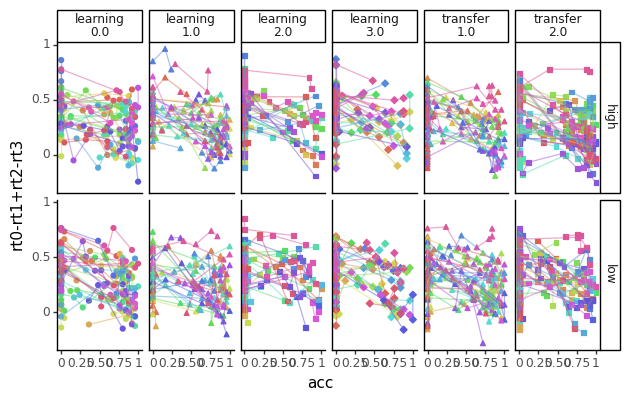

<ggplot: (149620237831)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 7 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzlowOverAcc.png


In [25]:
subj_dat = all_data_w.groupby(['sid', 'trial_type', 'phase', 'block', 'goal_star']).aggregate('mean').reset_index()

gg.options.figure_size = (7, 4)
g = (gg.ggplot(subj_dat, gg.aes('acc', 'rt0-rt1+rt2-rt3', color='factor(sid)', shape='factor(goal_star)'))
     + gg.geom_point()
     + gg.geom_line(alpha=0.5)
#      + gg.geom_smooth(gg.aes(group=1))
     + gg.theme(legend_position='none')
     + gg.facet_grid('phase ~ trial_type + goal_star')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzzlowOverAcc.png'))

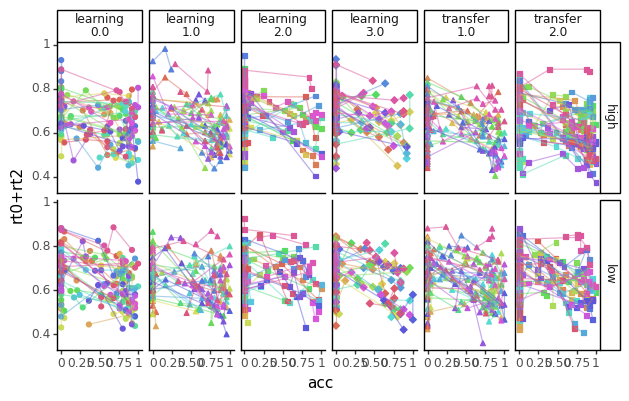

<ggplot: (149620237831)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 7 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzhighOverAcc.png


In [26]:
g += gg.aes(y='rt0+rt2')
print(g)
g.save(os.path.join(plot_dir, '101_RtzzhighOverAcc.png'))

In [27]:
# subj_dat = all_data.groupby(['sid', 'subtrial', 'trial_type', 'phase', 'block', 'goal_star']).aggregate('mean').reset_index()
# gg.options.figure_size = (7, 4)
# g = (gg.ggplot(subj_dat, gg.aes('acc', 'rt_zz_low', color='factor(sid)', shape='factor(goal_star)'))
#      + gg.geom_point()
#      + gg.geom_line(alpha=0.5)
# #      + gg.geom_smooth(gg.aes(group=1))
#      + gg.theme(legend_position='none')
#      + gg.facet_grid('phase ~ trial_type + goal_star')
#     )
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzzlowOverAcc.png'))

In [28]:
# g += gg.aes(y='rt_zz_high')
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzzhighOverAcc.png'))

# When do 2-key sequences get activated?

In [30]:
# all_data['middle_item_bool'] = all_data['middle_item'] != -1
# all_data['star_bool'] = all_data['unlocked_star'] != -1

# id_cols = ['sid', 'phase', 'trial_type', 'block', 'trial']
# interest_cols = ['middle_item_bool', 'rt_zz_low', 'rt_zz_high', 'rt', 'log_rt']
# sum_dat = all_data.loc[all_data['subtrial'].isin([1, 3])].groupby(id_cols).aggregate('sum').reset_index()[id_cols + interest_cols]
# sum_dat

In [31]:
# subj_dat = sum_dat.groupby(['sid', 'phase', 'trial_type', 'middle_item_bool']).aggregate('mean').reset_index()

# gg.options.figure_size = (4, 3.5)
# g = (gg.ggplot(subj_dat, gg.aes('factor(middle_item_bool)', 'rt_zz_low', group=1))
# #      + gg.geom_point(position=gg.position_dodge(width=0.3))
# #      + gg.geom_line(position=gg.position_dodge(width=0.3), linetype='dotted')
#      + gg.stat_summary()
#      + gg.stat_summary(geom='line')
#      + gg.labs(x='N middle items obtained')
#      + gg.facet_grid('phase ~ trial_type')
#     )
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzigzagOverItemSuccess.png'))

In [32]:
# g += gg.aes(y='rt_zz_high')
# g

In [33]:
# g += gg.aes(y='rt')
# print(g)
# g.save(os.path.join(plot_dir, '101_RtsOverItemSuccess.png'))
# gg.options.figure_size = (5, 5)

## Effect of intermediate item on RTs

In [34]:
# Get trials with middle item at position 1, and with no item at position 1
all_data['bool_middle_item'] = np.invert(np.isnan(all_data['middle_item'])) * (all_data['middle_item'] != -1)

got_middle_sub_dat = all_data.loc[(all_data['bool_middle_item']) & (all_data['subtrial'] == 1)]
got_middle_idxs = got_middle_sub_dat[['sid', 'phase', 'trial_type', 'block', 'trial']]

no_middle_sub_dat = all_data.loc[np.invert(all_data['bool_middle_item']) & (all_data['subtrial'] == 1)]
no_middle_idxs = no_middle_sub_dat[['sid', 'phase', 'trial_type', 'block', 'trial']]

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\pandas\core\computation\expressions.py:200: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead


In [35]:
# Create column that says whether each trial had an item in position 1 or not (`got_middle`)
got_middle = pd.merge(got_middle_idxs, all_data, how='left')
no_middle = pd.merge(no_middle_idxs, all_data, how='left')

assert np.round(got_middle.shape[0] / got_middle_idxs.shape[0]) == 4
assert np.round(no_middle.shape[0] / no_middle_idxs.shape[0]) == 4

got_middle['got_middle_item'] = True
no_middle['got_middle_item'] = False

mid_data = pd.concat([got_middle, no_middle])
mid_data

,sid,phase,trial_type,block,trial,rt,stimulus,key_press,trial_index,time_elapsed,...,star1_inplace,star2_inplace,star3_inplace,sex,age_years,age_months,chance_performer,middle_item_bool,star_bool,got_middle_item
0,13885,high,learning,0.0,0.0,797.865,0.0,85.0,297.0,2422963.0,...,False,False,False,Female,21.0,6.0,False,True,True,True
1,13885,high,learning,0.0,0.0,654.720,0.0,73.0,298.0,2423619.0,...,False,False,False,Female,21.0,6.0,False,True,True,True
2,13885,high,learning,0.0,0.0,1317.900,0.0,79.0,299.0,2424938.0,...,False,False,False,Female,21.0,6.0,False,True,True,True
3,13885,high,learning,0.0,0.0,276.305,0.0,80.0,300.0,2425216.0,...,False,False,False,Female,21.0,6.0,False,False,False,True
4,13885,high,learning,0.0,5.0,204.555,0.0,85.0,322.0,2433706.0,...,False,False,False,Female,21.0,6.0,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59497,39925,low,transfer,7.0,21.0,337.290,0.0,85.0,2779.0,1233059.0,...,True,False,False,Male,18.0,10.0,True,False,False,False
59498,39925,low,transfer,7.0,22.0,374.585,0.0,80.0,2781.0,1233946.0,...,True,False,False,Male,18.0,10.0,True,True,True,False
59499,39925,low,transfer,7.0,22.0,588.255,0.0,79.0,2782.0,1234539.0,...,True,False,False,Male,18.0,10.0,True,False,True,False
59500,39925,low,transfer,7.0,22.0,419.135,0.0,80.0,2783.0,1234963.0,...,True,False,False,Male,18.0,10.0,True,True,True,False


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.


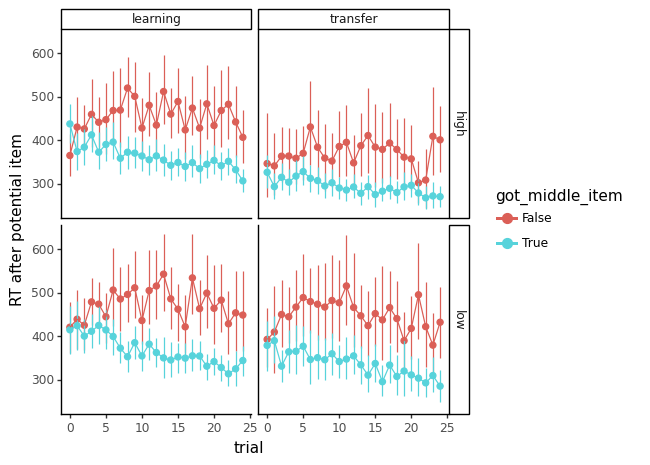

<ggplot: (149619345047)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_item3RtsOverTrial.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.


In [36]:
subj_dat = mid_data.loc[mid_data['subtrial'] == 2].groupby(['sid', 'trial_type', 'phase', 'trial', 'got_middle_item']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 5)
g = (gg.ggplot(subj_dat, gg.aes('trial', 'rt', color='got_middle_item'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(y='RT after potential item')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_item3RtsOverTrial.png'))

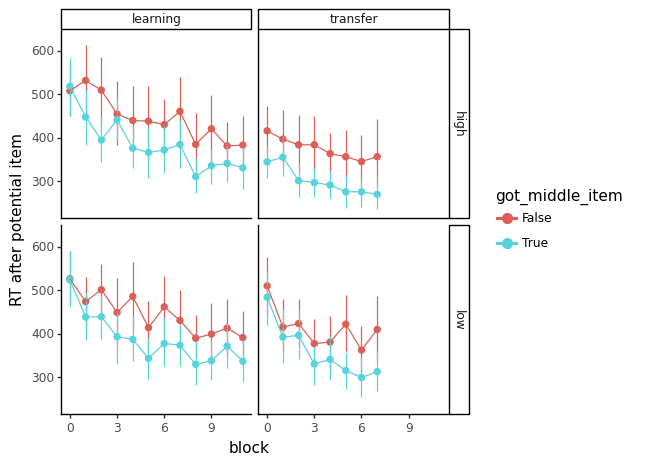

<ggplot: (149619345047)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_item3RtsOverBlock.png


In [37]:
subj_dat = mid_data.loc[mid_data['subtrial'] == 2].groupby(['sid', 'trial_type', 'phase', 'block', 'got_middle_item']).aggregate('mean').reset_index()

g += gg.aes(x='block')
g.data = subj_dat
print(g)
g.save(os.path.join(plot_dir, '101_item3RtsOverBlock.png'))

## RT zigzag 4-item stars vs 3-item stars

In [39]:
# all_data['n_unique_items'] = get_n_unique_items(all_data)
# subj_dat = all_data.groupby(['sid', 'goal_star', 'phase', 'trial_type']).aggregate('mean').reset_index()

# gg.options.figure_size = (4, 4)
# g = (gg.ggplot(subj_dat, gg.aes('factor(goal_star)', 'rt_zz_low', color='factor(n_unique_items)'))
#      + gg.stat_summary()
#      + gg.facet_grid('phase ~ trial_type')
#     )
# print(g)
# g.save(os.path.join(plot_dir, '101_rtzzlowOverStar.png'))

In [40]:
# g += gg.aes(y='rt_zz_high')
# print(g)

In [41]:
# g += gg.aes(y='acc')
# print(g)

In [42]:
# g += gg.aes(y='log_rt')
# print(g)

## RT patterns for correct vs incorrect items and stars

In [43]:
subj_dat = all_data.loc[(all_data['subtrial'].isin([1, 3]))]
subj_dat['bool_middle_item'] = np.invert(np.isnan(subj_dat['middle_item'])) & (subj_dat['middle_item'] != -1)
subj_dat['bool_unlocked_star'] = np.invert(np.isnan(subj_dat['unlocked_star'])) & (subj_dat['unlocked_star'] != -1)

gg.options.figure_size = (3, 3)
g = (gg.ggplot(subj_dat, gg.aes('bool_middle_item', 'rt_zz_low', color='phase', group='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.5))
     + gg.stat_summary(position=gg.position_dodge(width=0.5), geom='line')
     + gg.labs(color='')
     + gg.facet_grid('subtrial ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzzlowOverItemAchieved.png'))

<ipython-input-43-c356787983ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-43-c356787983ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


PlotnineError: "Could not evaluate the 'y' mapping: 'rt_zz_low' (original error: name 'rt_zz_low' is not defined)"

In [ ]:
g += gg.aes(y='rt_zz_high')
print(g)
g.save(os.path.join(plot_dir, '101_RtzzhighOverItemAchieved.png'))

In [ ]:
g += gg.aes(y='log_rt')
print(g)

In [ ]:
gg.options.figure_size = (3, 2)
g += gg.aes(x='bool_unlocked_star')
g.data = g.data.loc[g.data['subtrial'] == 3]
print(g)
g.save(os.path.join(plot_dir, '101_RtzzhighOverStarAchieved.png'))

In [ ]:
g += gg.aes(y='rt_zz_low')
print(g)
g.save(os.path.join(plot_dir, '101_RtzzlowOverStarAchieved.png'))

In [ ]:
g += gg.aes(y='rt_zz_high')
print(g)

### Add column trial_with_middle_item to all_data

In [ ]:
cols = ['sid', 'trial', 'subtrial', 'action_id', 'acc', 'middle_item_name', 'unlocked_star_name']
all_data['trial_with_middle_item'] = all_data['middle_item_name'].apply(lambda x : x > -1).astype(int)
all_data[cols + ['trial_with_middle_item']][:15]

In [ ]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'trial']
trial_with_middle_item_dat = all_data[id_cols + ['trial_with_middle_item']].groupby(id_cols).aggregate('max').reset_index()
trial_with_middle_item_dat

In [ ]:
all_data = pd.merge(all_data, trial_with_middle_item_dat, how='left')
all_data[id_cols + ['subtrial', 'trial_with_middle_item']][:10]

In [ ]:
subj_dat = all_data.groupby(['sid', 'trial_type', 'phase', 'subtrial', 'trial_with_middle_item']).aggregate('mean').reset_index()

gg.options.figure_size = (3, 2)
g = (gg.ggplot(subj_dat, gg.aes('subtrial', 'rt', color='phase'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('trial_with_middle_item ~ trial_type')
    )
g.save(os.path.join(plot_dir, '101_RtOverSubtrial.png'))
print(g)